## 1. Import and Install Dependencies

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

There are a few peculiarities with the GUI in OpenCV. The destroyImage call fails to close a window (atleast under Linux, where the default backend was Gtk+ until 2.1.0) unless waitKey was called to pump the events. Adding a waitKey(1) call right after destroyWindow may work.

Even so, closing is not guaranteed; the the waitKey function is only intercepted if a window has focus, and so if the window didn't have focus at the time you invoked destroyWindow, chances are it'll stay visible till the next destroyWindow call.

I'm assuming this is a behaviour that stems from Gtk+; the function didn't give me any trouble when I used it under Windows.

## 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections


In [4]:
def draw_styled_landmarks(image, results):
    
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 

    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 

    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [5]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image, results

In [6]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame=cap.read()
        
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        draw_styled_landmarks(image,results)
        
        
        cv2.imshow("OpenCV Feed", image)
        
        if cv2.waitKey(10) & 0xFF == ord("q"):
            break
        
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
len(results.face_landmarks.landmark)

468

In [8]:
draw_landmarks(frame, results)

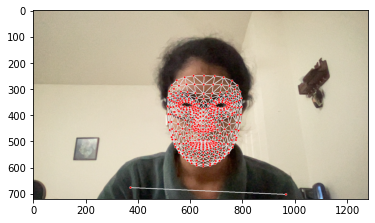

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## 3. Extract Keypoint Values

In [10]:
pose=[]
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)


In [11]:
pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [12]:
len(pose)

132

In [13]:
len(rh)

63

In [14]:
len(lh)

63

In [15]:
len(face)

1404

In [16]:
def extract_keypoints(results):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

    face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    
    return np.concatenate([pose, face, lh, rh])

In [17]:
extract_keypoints(results).shape

(1662,)

## 4. Setup Folders for Collection

In [18]:
DATA_PATH = os.path.join('MP_Data') 
actions = np.array(['hello', 'thanks', 'iloveyou'])
no_sequences = 30
sequence_length = 30

In [19]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## 5. Collect Keypoint Values for Training and Testing

In [20]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                ret, frame = cap.read()

                image, results = mediapipe_detection(frame, holistic)

                draw_styled_landmarks(image, results)

                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                    cv2.imshow('OpenCV Feed', image)

                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

## 6. Preprocess Data and Create Labels and Features

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [22]:
label_map = {label:num for num, label in enumerate(actions)}

In [23]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [24]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [25]:
np.array(sequences).shape

(90, 30, 1662)

In [26]:
np.array(labels).shape

(90,)

In [27]:
X = np.array(sequences)

In [28]:
y = to_categorical(labels).astype(int)

In [29]:
X.shape

(90, 30, 1662)

In [30]:
y.shape

(90, 3)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [32]:
X_test.shape

(5, 30, 1662)

## 7. Build and Train LSTM Neural Network

Why using LSTM Model?

- Faster to train
- Less Data is required
- Faster Detections

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [34]:
# Monitor the network while training
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [35]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

2022-01-01 20:29:59.017592: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-01 20:29:59.019477: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [36]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [37]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Train on 85 samples
Epoch 1/2000
32/85 [==========>...................] - ETA: 6s - loss: 1.0992 - categorical_accuracy: 0.3750

2022-01-01 20:30:05.942653: I tensorflow/core/profiler/lib/profiler_session.cc:184] Profiler session started.


85/85 [==============================] - 5s 58ms/sample - loss: 3.8437 - categorical_accuracy: 0.3765
Epoch 2/2000
85/85 [==============================] - 1s 9ms/sample - loss: 1.1911 - categorical_accuracy: 0.2824
Epoch 3/2000
85/85 [==============================] - 1s 9ms/sample - loss: 3.0880 - categorical_accuracy: 0.3294
Epoch 4/2000
85/85 [==============================] - 1s 8ms/sample - loss: 1.8484 - categorical_accuracy: 0.3529
Epoch 5/2000
85/85 [==============================] - 1s 9ms/sample - loss: 1.4484 - categorical_accuracy: 0.1647
Epoch 6/2000
85/85 [==============================] - 1s 8ms/sample - loss: 1.0366 - categorical_accuracy: 0.3529
Epoch 7/2000
85/85 [==============================] - 1s 9ms/sample - loss: 0.8464 - categorical_accuracy: 0.4941
Epoch 8/2000
85/85 [==============================] - 1s 9ms/sample - loss: 0.6743 - categorical_accuracy: 0.6235
Epoch 9/2000
85/85 [==============================] - 1s 9ms/sample - loss: 0.5748 - categorical_acc

85/85 [==============================] - 1s 8ms/sample - loss: 0.0410 - categorical_accuracy: 0.9882
Epoch 73/2000
85/85 [==============================] - 1s 8ms/sample - loss: 0.0327 - categorical_accuracy: 0.9882
Epoch 74/2000
85/85 [==============================] - 1s 8ms/sample - loss: 0.0331 - categorical_accuracy: 0.9882
Epoch 75/2000
85/85 [==============================] - 1s 8ms/sample - loss: 0.0323 - categorical_accuracy: 0.9882
Epoch 76/2000
85/85 [==============================] - 1s 8ms/sample - loss: 0.0250 - categorical_accuracy: 0.9882
Epoch 77/2000
85/85 [==============================] - 1s 8ms/sample - loss: 0.0202 - categorical_accuracy: 0.9882
Epoch 78/2000
85/85 [==============================] - 1s 8ms/sample - loss: 0.0155 - categorical_accuracy: 0.9882
Epoch 79/2000
85/85 [==============================] - 1s 8ms/sample - loss: 0.0094 - categorical_accuracy: 1.0000
Epoch 80/2000
85/85 [==============================] - 1s 8ms/sample - loss: 0.0095 - categori

85/85 [==============================] - 1s 9ms/sample - loss: 1.9756e-04 - categorical_accuracy: 1.0000
Epoch 142/2000
85/85 [==============================] - 1s 9ms/sample - loss: 1.9410e-04 - categorical_accuracy: 1.0000
Epoch 143/2000
85/85 [==============================] - 1s 9ms/sample - loss: 1.8982e-04 - categorical_accuracy: 1.0000
Epoch 144/2000
85/85 [==============================] - 1s 9ms/sample - loss: 1.8463e-04 - categorical_accuracy: 1.0000
Epoch 145/2000
85/85 [==============================] - 1s 9ms/sample - loss: 1.7977e-04 - categorical_accuracy: 1.0000
Epoch 146/2000
85/85 [==============================] - 1s 9ms/sample - loss: 1.7552e-04 - categorical_accuracy: 1.0000
Epoch 147/2000
85/85 [==============================] - 1s 9ms/sample - loss: 1.7120e-04 - categorical_accuracy: 1.0000
Epoch 148/2000
85/85 [==============================] - 1s 9ms/sample - loss: 1.6684e-04 - categorical_accuracy: 1.0000
Epoch 149/2000
85/85 [==============================] -

85/85 [==============================] - 1s 8ms/sample - loss: 5.9689e-05 - categorical_accuracy: 1.0000
Epoch 210/2000
85/85 [==============================] - 1s 8ms/sample - loss: 5.9080e-05 - categorical_accuracy: 1.0000
Epoch 211/2000
85/85 [==============================] - 1s 8ms/sample - loss: 5.8431e-05 - categorical_accuracy: 1.0000
Epoch 212/2000
85/85 [==============================] - 1s 9ms/sample - loss: 5.7788e-05 - categorical_accuracy: 1.0000
Epoch 213/2000
85/85 [==============================] - 1s 8ms/sample - loss: 5.6964e-05 - categorical_accuracy: 1.0000
Epoch 214/2000
85/85 [==============================] - 1s 8ms/sample - loss: 5.6131e-05 - categorical_accuracy: 1.0000
Epoch 215/2000
85/85 [==============================] - 1s 8ms/sample - loss: 5.5608e-05 - categorical_accuracy: 1.0000
Epoch 216/2000
85/85 [==============================] - 1s 8ms/sample - loss: 5.4592e-05 - categorical_accuracy: 1.0000
Epoch 217/2000
85/85 [==============================] -

85/85 [==============================] - 2s 20ms/sample - loss: 2.9277e-05 - categorical_accuracy: 1.0000
Epoch 278/2000
85/85 [==============================] - 1s 16ms/sample - loss: 2.9113e-05 - categorical_accuracy: 1.0000
Epoch 279/2000
85/85 [==============================] - 1s 14ms/sample - loss: 2.8841e-05 - categorical_accuracy: 1.0000
Epoch 280/2000
85/85 [==============================] - 1s 16ms/sample - loss: 2.8555e-05 - categorical_accuracy: 1.0000
Epoch 281/2000
32/85 [==========>...................] - ETA: 0s

KeyboardInterrupt: 

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

## 8. Make Predictions

In [39]:
res = model.predict(X_test)

In [40]:
actions[np.argmax(res[1])]

'thanks'

In [41]:
actions[np.argmax(y_test[1])]

'thanks'

## 9. Save Weights

In [42]:
model.save('action.h5')

## 10. Evaluation using Confusion Matrix and Accuracy


In [43]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [44]:
yhat = model.predict(X_test)

In [45]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [46]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[1, 0],
        [0, 4]]])

In [48]:
accuracy_score(ytrue, yhat)

1.0

## 11. Test in Real Time

In [49]:
from scipy import stats

In [64]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [73]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

<class 'mediapipe.python.solution_base.SolutionOutputs'>


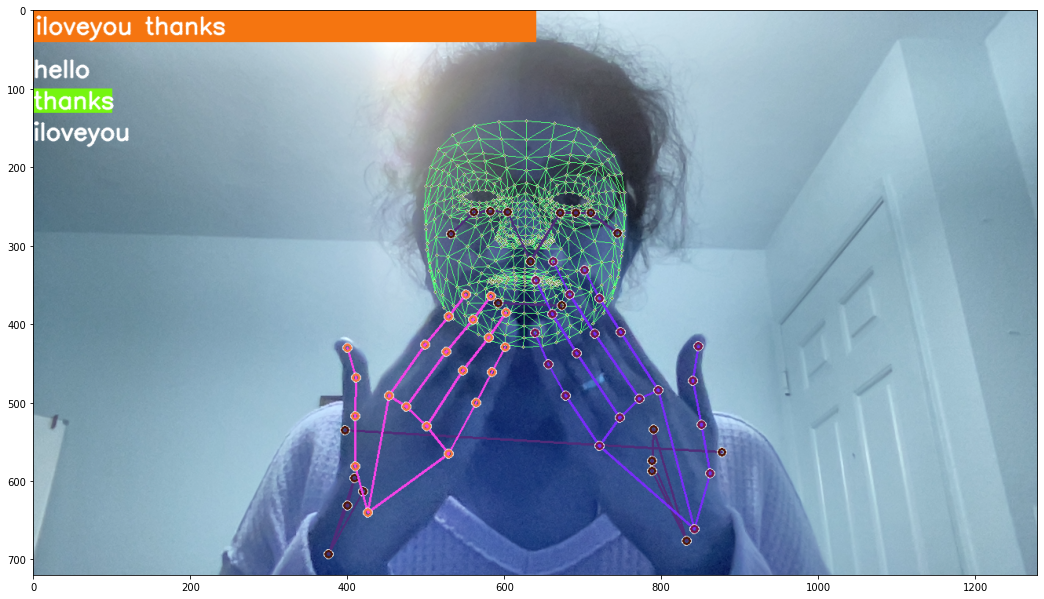

In [70]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))